In [1]:
import tensorflow as tf
keras=tf.keras
layers=keras.layers

In [2]:
(x_train,_), (x_test,_)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_test=x_test.reshape(x_test.shape[0],-1)#压平
x_train=x_train.reshape(x_train.shape[0],-1)
x_test.shape,x_train.shape

((10000, 784), (60000, 784))

In [5]:
x_test=tf.cast(x_test,tf.float32)/255
x_train=tf.cast(x_train,tf.float32)/255


In [6]:
input_size=784
hidden_size=32
output_size=784

In [7]:
input=keras.layers.Input(shape=(input_size,))
en=layers.Dense(hidden_size,activation='swish')(input)
de=layers.Dense(output_size,activation='sigmoid')(en)
model=keras.Model(inputs=input,outputs=de)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [10]:
model.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1135 - mae: 0.2575 - val_loss: 0.0449 - val_mae: 0.1174
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0409 - mae: 0.1091 - val_loss: 0.0313 - val_mae: 0.0884
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0297 - mae: 0.0852 - val_loss: 0.0248 - val_mae: 0.0739
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0240 - mae: 0.0723 - val_loss: 0.0208 - val_mae: 0.0646
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0206 - mae: 0.0641 - val_loss: 0.0186 - val_mae: 0.0586
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0187 - mae: 0.0587 - val_loss: 0.0174 - val_mae: 0.0550
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0176 - mae: 0.0552 - val_loss: 0.0167 - val_mae: 0.0526
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.

In [11]:
encode=keras.Model(inputs=input,outputs=en)

In [12]:

model.fit(x_train,x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0120 - mae: 0.0406 - val_loss: 0.0117 - val_mae: 0.0400
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0120 - mae: 0.0405 - val_loss: 0.0116 - val_mae: 0.0396
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0119 - mae: 0.0404 - val_loss: 0.0116 - val_mae: 0.0396
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0118 - mae: 0.0403 - val_loss: 0.0115 - val_mae: 0.0395
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0118 - mae: 0.0402 - val_loss: 0.0115 - val_mae: 0.0394
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0118 - mae: 0.0401 - val_loss: 0.0114 - val_mae: 0.0392
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0117 - mae: 0.0400 - val_loss: 0.0114 - val_mae: 0.0392
Epoch 8/50
235/235 [==============================] - 2s 6ms/step - loss: 0.

In [13]:
input_de=keras.layers.Input(shape=(hidden_size,))
output_de=model.layers[-1](input_de)
decode=keras.Model(inputs=input_de,outputs=output_de)


In [14]:
x_test_1=encode(x_test)
x_test_1.shape

TensorShape([10000, 32])

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
decode1=decode.predict(x_test_1)
decode1.shape

(10000, 784)

In [17]:
decode1=model.predict(x_test)
decode1.shape

(10000, 784)

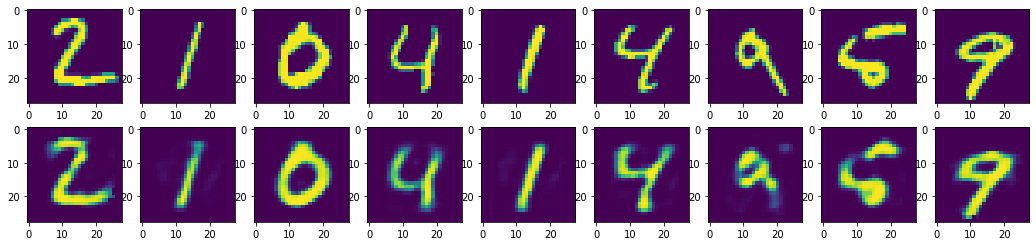

In [18]:
import numpy as np
n=10
plt.figure(figsize=(20,4))
for i in range(1,n):
    ax=plt.subplot(2,n,i)
    plt.imshow(np.reshape(x_test[i],(28,28)))
    ax=plt.subplot(2,n,i+n)
    plt.imshow(decode1[i].reshape(28,28))

In [19]:
#VAE和GAN

In [27]:
class VAE_model(tf.keras.Model):
    def __init__(self):
        super(VAE_model, self).__init__()
        self.resNet=resNet=keras.applications.ResNet101(include_top=False,weights='imagenet',
        input_shape=(512,512,3))
        self.conv1=ConvBlock(1024,strides=1)
        self.conv2=ConvBlock(1024,strides=1)
        self.up1=SegHead(1024)
        self.up2=SegHead(512)
        self.up3=SegHead(256)
        self.up4=SegHead(128)
        self.up5=SegHead(3,activation='sigmoid')
        
    def encode(self, x):
        h1 = resNet(x)
        return self.conv1(h1), self.conv2(h1)
    
    def reparameters(self, mu, logvar):
        std = tf.math.exp(0.5*logvar)
        eps = tf.random.normal(std.shape, mean=0.0, stddev=1.0)
        return mu + eps*std
        
    def decode(self, z):
        x=self.up1(z)
        x=self.up2(x)
        x=self.up3(x)
        x=self.up4(x)      
        return self.up5(x)
    
    def call(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameters(mu, logvar)
        return self.decode(z), mu, logvar

In [28]:
resNet=keras.applications.ResNet101(include_top=False,weights='imagenet',input_shape=(512,512,3))
resNet.output

<KerasTensor: shape=(None, 16, 16, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [29]:
class upsampool(layers.Layer):
    def __init__(self,units,activation='swish'):
        super(upsampool,self).__init__()
        self.activation=activation
        self.up1=layers.Conv2DTranspose(units,kernel_size=3,strides=2,padding='same')
        self.bn=layers.BatchNormalization()
    def call(self,input):
        x=self.up1(input)
        x=self.bn(x)
        if self.activation=='sigmoid' :
            return tf.nn.sigmoid(x)
        return tf.nn.swish(x)

In [33]:
class ConvBlock(layers.Layer):
    def __init__(self,units,kernel_size=3,strides=1,use_activation=True):
        super(ConvBlock,self).__init__()
        self.conv2d=layers.Conv2D(units,kernel_size=kernel_size,strides=strides,padding='same')
        self.bn=layers.BatchNormalization()
        self.ua=use_activation
    def call(self,input):
        x=self.conv2d(input)
        x=self.bn(x)
        if self.ua==True:
            x=tf.nn.swish(x)
        return x

In [36]:
class SegHead(layers.Layer):
    def __init__(self,units,activation='swish'):
        #上采样的倍数由不同数据而改变
        super(SegHead,self).__init__()
        self.conv1=ConvBlock(units=units,kernel_size=3,strides=1)
        self.conv2=ConvBlock(units=units,kernel_size=1,strides=1,use_activation=False)
        self.up=upsampool(units,activation=activation)
    def call(self,input):
        x1=self.conv1(input)
        x1=self.conv2(x1)
        x1=self.up(x1)
        return x1


In [37]:
tf.expand_dims(img,axis=0)

ValueError: in user code:

    <ipython-input-27-dc6bdd308558>:32 call  *
        z = self.reparameters(mu, logvar)
    <ipython-input-27-dc6bdd308558>:20 reparameters  *
        eps = tf.random.normal(std.shape, mean=0.0, stddev=1.0)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper  **
        return target(*args, **kwargs)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\ops\random_ops.py:90 random_normal
        shape_tensor = tensor_util.shape_tensor(shape)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:1035 shape_tensor
        return ops.convert_to_tensor(shape, dtype=dtype, name="shape")
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\profiler\trace.py:163 wrapped
        return func(*args, **kwargs)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py:1540 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\constant_op.py:356 _tensor_shape_tensor_conversion_function
        "Cannot convert a partially known TensorShape to a Tensor: %s" % s)

    ValueError: Cannot convert a partially known TensorShape to a Tensor: (None, 16, 16, 1024)
